# Imports

In [1]:
import numpy             as np
import pandas            as pd
import seaborn           as sns
import plotly.express    as px
import matplotlib.pyplot as plt

from IPython.core.display import HTML
from geopy.geocoders      import Nominatim
from tabulate             import tabulate
from geopy                import distance
from geopy.distance       import great_circle

## Helper Functions

In [2]:
def personal_settings():
     # plotly settings
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [20, 10]
    plt.rcParams['font.size'] = 24
        
    # notebook settings
    display(HTML('<style>.container{width:90% !important;}</style>'))
    np.set_printoptions(suppress=True)
    pd.set_option('display.float_format', '{:.2f}'.format)

    # seaborn settings
    sns.set(rc={'figure.figsize':(15,10)})
    sns.set_theme(style = 'darkgrid', font_scale = 1.5)

In [3]:
personal_settings()

## Loading Data

In [4]:
df_raw = pd.read_csv(r'../datasets/raw/kc_house_data.csv')

# Data Description

In [5]:
df1=df_raw.copy()

## Rename Columns

In [6]:
# checking columns names
df1.columns # nothing to rename

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

## Data Dimension

In [7]:
print('Number of rows: {}' .format (df1.shape[0]))
print('Number of columns: {}' .format (df1.shape[1]))

Number of rows: 21613
Number of columns: 21


## Data Types

In [8]:
df1.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.00,3,1.00,1180,5650,1.00,0,0,...,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
1,6414100192,20141209T000000,538000.00,3,2.25,2570,7242,2.00,0,0,...,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639
2,5631500400,20150225T000000,180000.00,2,1.00,770,10000,1.00,0,0,...,6,770,0,1933,0,98028,47.74,-122.23,2720,8062
3,2487200875,20141209T000000,604000.00,4,3.00,1960,5000,1.00,0,0,...,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000
4,1954400510,20150218T000000,510000.00,3,2.00,1680,8080,1.00,0,0,...,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503


In [9]:
df1.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

## Check NA

In [10]:
df1.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

## Fill out NA

In [11]:
# nothing to fill

## Change Variables Types

In [12]:
# changing 'date' type from OBJECT to DATE or INT

# checking DATES types
print("------ BEFORE")
display(df1[['date','yr_built','yr_renovated']].head())
display(df1[['date','yr_built','yr_renovated']].dtypes)

# changing dtypes
df1['date']         = pd.to_datetime(df1['date'],         format='%Y-%m-%d')
# df1['yr_built']     = pd.to_datetime(df1['yr_built'],     format='%Y-%m-%d')
# df1['yr_renovated'] = pd.to_datetime(df1['yr_renovated'], format='%Y-%m-%d')

# checking DATES types
print("")
print("------ AFTER")
display(df1[['date','yr_built','yr_renovated']].head())
display(df1[['date','yr_built','yr_renovated']].dtypes)

------ BEFORE


,date,yr_built,yr_renovated
0,20141013T000000,1955,0
1,20141209T000000,1951,1991
2,20150225T000000,1933,0
3,20141209T000000,1965,0
4,20150218T000000,1987,0


date            object
yr_built         int64
yr_renovated     int64
dtype: object


------ AFTER


,date,yr_built,yr_renovated
0,2014-10-13,1955,0
1,2014-12-09,1951,1991
2,2015-02-25,1933,0
3,2014-12-09,1965,0
4,2015-02-18,1987,0


date            datetime64[ns]
yr_built                 int64
yr_renovated             int64
dtype: object

## Dropping Duplicates

In [13]:
print(df1.shape[0], 'number of rows')
print(df1['id'].unique().shape[0], 'uniques ids')
print(df1.shape[0] - df1['id'].unique().shape[0], '  number of duplicated ids')

21613 number of rows
21436 uniques ids
177   number of duplicated ids


In [14]:
# sorting dataframe by date
df1 = df1.sort_values('date', ascending=True)

# deleting ids that appears first
df1 = df1.drop_duplicates(subset='id', keep='last')

print('new shape:', df1.shape)

new shape: (21436, 21)


## Descriptive Statistics

In [15]:
num_df1 = df1.select_dtypes(include=['int64','float64'])
cat_df1 = df1.select_dtypes(exclude=['int64','float64','datetime64[ns]'])

### Numerical Attributes

In [16]:
num_df1.shape

(21436, 20)

In [17]:
# central tendendy - mean, median
ct1 = pd.DataFrame(num_df1.apply(np.mean)).T
ct2 = pd.DataFrame(num_df1.apply(np.median)).T

# dispersion - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame(num_df1.apply(np.std)).T
d2 = pd.DataFrame(num_df1.apply(min)).T
d3 = pd.DataFrame(num_df1.apply(max)).T
d4 = pd.DataFrame(num_df1.apply(lambda x: x.max() - x.min())).T
d5 = pd.DataFrame(num_df1.apply(lambda x: x.skew())).T
d6 = pd.DataFrame(num_df1.apply(lambda x: x.kurtosis)).T

# concatenate 
m = pd.concat([d2,d3,d4,ct1,ct2,d1,d5,d6]).T.reset_index()
m.columns = ['attributes','min','max','range','mean','median','std','skew','kurtosis']
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,id,1000102.0,9900000190.0,9899000088.0,4580765328.18,3904921185.0,2876522535.73,0.24,<bound method NDFrame._add_numeric_operations....
1,price,75000.0,7700000.0,7625000.0,541649.96,450000.0,367306.36,4.04,<bound method NDFrame._add_numeric_operations....
2,bedrooms,0.0,33.0,33.0,3.37,3.0,0.93,1.99,<bound method NDFrame._add_numeric_operations....
3,bathrooms,0.0,8.0,8.0,2.12,2.25,0.77,0.51,<bound method NDFrame._add_numeric_operations....
4,sqft_living,290.0,13540.0,13250.0,2082.7,1920.0,919.13,1.47,<bound method NDFrame._add_numeric_operations....
5,sqft_lot,520.0,1651359.0,1650839.0,15135.64,7614.0,41537.65,13.04,<bound method NDFrame._add_numeric_operations....
6,floors,1.0,3.5,2.5,1.5,1.5,0.54,0.61,<bound method NDFrame._add_numeric_operations....
7,waterfront,0.0,1.0,1.0,0.01,0.0,0.09,11.34,<bound method NDFrame._add_numeric_operations....
8,view,0.0,4.0,4.0,0.24,0.0,0.77,3.39,<bound method NDFrame._add_numeric_operations....
9,condition,1.0,5.0,4.0,3.41,3.0,0.65,1.04,<bound method NDFrame._add_numeric_operations....


### Categorical Attributes

In [18]:
cat_df1.shape # no attributes

(21436, 0)

# Variable Filtering 

In [19]:
df2=df1.copy()

In [20]:
df2 = df2.drop (['view', 'sqft_living15','sqft_lot15'], axis=1)

# === notes:
# view          	An index from 0 to 4 of how good the view of the property was
# sqft_living15 	The square footage of interior housing living space for the nearest 15 neighbors
# sqft_lot15    	The square footage of the land lots of the nearest 15 neighbors

In [21]:
# checking properties 'sqft_living' by number of bedrooms
print(df2[['bedrooms','sqft_living']].groupby(['bedrooms']).mean().sort_values('sqft_living', ascending=True))
print(df2[['id','bedrooms']].groupby(['bedrooms']).count(),'\n')

df2 = df2[ (df2['bedrooms']!=0) & (df2['bedrooms']!=11) & (df2['bedrooms']!=33) ]

          sqft_living
bedrooms             
1              884.94
2             1240.54
33            1620.00
0             1707.85
3             1807.60
4             2556.00
11            3000.00
5             3054.82
6             3310.76
10            3706.67
9             3775.00
8             3800.00
7             3974.21
            id
bedrooms      
0           13
1          194
2         2736
3         9731
4         6849
5         1586
6          265
7           38
8           13
9            6
10           3
11           1
33           1 



# Feature Engineering

In [22]:
df3 = df2.copy()

## <font color= 'red'>Mind Map Hypothesis

## Creating Hypothesis

1. Properties that have water view are 50% more expensive.
2. Properties with basements have higher grade.
3. Properties with basements have bigger interior living space.
4. Properties with basements are 15% more expensive.
5. Properties built with basements decreased over the years.
6. Properties with 1 to 2 bathrooms are 20% more expensive than those with up to 1 bathroom.
7. Properties with 3 bedrooms are 25% more expensive than those which have 2 bedrooms.
8.  Properties with 2 floors are 15% more expensive than those with 1 floor.
9. Most properties (+50%) became available during summer/spring.
10. Properties available during summer/spring are 20% more expensive.
11. Most properties (+50%) are localized in a 15km radio from the lake.
12. Most of properties (+50%) that should be bought are in a 15km radius from the lake.
13. Properties selected to be bought that are localized in a 15km radius from lake correspond to more than 50% of expected profit.
14. Properties have bigger interior living space along construction year timeline.
15. Properties that were not renovated are 40% cheaper.

## <font color ='red'>Features Creation


In [25]:
## getting data from API in a separate dataframe

# query
df3['query'] = df3[['lat','long']].apply(lambda x: str(x['lat']) + ',' + str(x['long']), axis=1)
df_geodata = df3[['id', 'query']].copy()

# creating empty columns
df_geodata['place_id']      = "NA"
df_geodata['road']          = 'NA'
df_geodata['house_number']  = 'NA'
df_geodata['neighbourhood'] = 'NA'
df_geodata['city']          = 'NA'
df_geodata['county']        = 'NA'
df_geodata['state']         = 'NA'
df_geodata['postcode']      = 'NA'


# auxiliar variable that helps localizing the adresses
geolocator = Nominatim (user_agent = 'geodata_api') 



import time
start_ = time.time()


# loop for
for i in range (df_geodata.shape[0]):
    
    print ('Loop: {} / {}'.format(i, df_geodata.shape[0]))
        
    # api request
    response = geolocator.reverse(df3.loc[i,'query']) # standard variable for API responses // 'reverse' returns an address by location point
    
    # populating data
    if 'place_id'in response.raw:
        df_geodata.loc[i, 'place_id']      = response.raw['place_id']
    if 'road'in response.raw['address']:
        df_geodata.loc[i, 'road']          = response.raw['address']['road']
    if 'house_number'in response.raw['address']:
        df_geodata.loc[i, 'house_number']  = response.raw['address']['house_number']
    if 'neighbourhood'in response.raw['address']:
        df_geodata.loc[i, 'neighbourhood'] = response.raw['address']['neighbourhood']
    if 'city'in response.raw['address']:
        df_geodata.loc[i, 'city']          = response.raw['address']['city']
    if 'county'in response.raw['address']:
        df_geodata.loc[i,'county']         = response.raw['address']['county']
    if 'state'in response.raw['address']:
        df_geodata.loc[i,'state']          = response.raw['address']['state']
    if 'postcode'in response.raw['address']:
        df_geodata.loc[i,'postcode']       = response.raw['address']['postcode']
    time.sleep(2)
    
end_ = time.time()
duration = end_ - start_
print("Elapsed Time = %s" % duration)

Loop: 0 / 21421
Loop: 1 / 21421
Loop: 2 / 21421
Loop: 3 / 21421
Loop: 4 / 21421
Loop: 5 / 21421
Loop: 6 / 21421
Loop: 7 / 21421
Loop: 8 / 21421
Loop: 9 / 21421
Loop: 10 / 21421
Loop: 11 / 21421
Loop: 12 / 21421
Loop: 13 / 21421
Loop: 14 / 21421
Loop: 15 / 21421
Loop: 16 / 21421
Loop: 17 / 21421
Loop: 18 / 21421
Loop: 19 / 21421
Loop: 20 / 21421
Loop: 21 / 21421
Loop: 22 / 21421
Loop: 23 / 21421
Loop: 24 / 21421
Loop: 25 / 21421
Loop: 26 / 21421
Loop: 27 / 21421
Loop: 28 / 21421
Loop: 29 / 21421
Loop: 30 / 21421
Loop: 31 / 21421
Loop: 32 / 21421
Loop: 33 / 21421
Loop: 34 / 21421
Loop: 35 / 21421
Loop: 36 / 21421
Loop: 37 / 21421
Loop: 38 / 21421
Loop: 39 / 21421
Loop: 40 / 21421
Loop: 41 / 21421
Loop: 42 / 21421
Loop: 43 / 21421
Loop: 44 / 21421
Loop: 45 / 21421
Loop: 46 / 21421
Loop: 47 / 21421
Loop: 48 / 21421
Loop: 49 / 21421
Loop: 50 / 21421
Loop: 51 / 21421
Loop: 52 / 21421
Loop: 53 / 21421
Loop: 54 / 21421
Loop: 55 / 21421
Loop: 56 / 21421
Loop: 57 / 21421
Loop: 58 / 21421
Loop: 5

KeyError: 93

In [24]:
df_geodata.head()

,id,query,place_id,road,house_number,neighbourhood,city,county,state,postcode
16768,5561000190,"47.4635,-121.991",NA,NA,NA,NA,NA,NA,NA,NA
9596,472000620,"47.6833,-122.4",NA,NA,NA,NA,NA,NA,NA,NA
9587,1024069009,"47.5794,-122.025",NA,NA,NA,NA,NA,NA,NA,NA
20602,7853361370,"47.515,-121.87",NA,NA,NA,NA,NA,NA,NA,NA
11577,5056500260,"47.5443,-122.177",NA,NA,NA,NA,NA,NA,NA,NA


In [23]:
# getting geodata temporarily
df_geodata = pd.read_csv('../datasets/interim/api_geodata.csv')

# merging df_geodata with df3
df3 = pd.merge(df3, df_geodata, how='left', on='id')
df3.head()

# saving df_geodata
df_geodata.to_csv('../datasets/interim/api_geodata_realstate.csv')

df3.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,...,zipcode,lat,long,query,road,house_number,neighbourhood,city,county,state
0,5561000190,2014-05-02,437500.00,3,2.25,1970,35100,2.00,0,4,...,98027,47.46,-121.99,"47.4635,-121.991",Southeast 154th Street,26069,NaN,NaN,King County,Washington
1,472000620,2014-05-02,790000.00,3,2.50,2600,4750,1.00,0,4,...,98117,47.68,-122.40,"47.6833,-122.4",34th Avenue Northwest,7506,Sunset Hill,Seattle,King County,Washington
2,1024069009,2014-05-02,675000.00,5,2.50,2820,67518,2.00,0,3,...,98029,47.58,-122.03,"47.5794,-122.025",Southeast 32nd Way,23601,NaN,NaN,King County,Washington
3,7853361370,2014-05-02,555000.00,4,2.50,3310,6500,2.00,0,3,...,98065,47.52,-121.87,"47.515,-121.87",Southeast Terrace Street,35246,NaN,NaN,King County,Washington
4,5056500260,2014-05-02,440000.00,4,2.25,2160,8119,1.00,0,3,...,98006,47.54,-122.18,"47.5443,-122.177",Southeast 65th Street,12201,NaN,Bellevue,King County,Washington


In [24]:
# radius from lake

# lake infos
lake_center = [{'lat':47.640883, 'long':-122.259250}]  
lake_tuple = 47.640883, -122.259250 

# distance from Lake
df3['dist_fromlake'] = df3['query'].apply(lambda x: great_circle(lake_tuple, x).km)

df3[['query','dist_fromlake']].sample(5) 

,query,dist_fromlake
9332,"47.5893,-122.299",6.46
3734,"47.5375,-122.374",14.36
5680,"47.5689,-122.408",13.73
20106,"47.5866,-122.175",8.74
5349,"47.5539,-122.268",9.69


In [25]:
# mean price by zipcode
a = df3[['price','zipcode']].groupby('zipcode').mean().reset_index().rename(columns={'price': 'mean_price_zipcode'})
a.head()

df3 = pd.merge(df3, a, on='zipcode', how='left')
df3[['id', 'price', 'zipcode', 'mean_price_zipcode']].sample(5)

,id,price,zipcode,mean_price_zipcode
3086,3574800520,441000.00,98034,522712.31
13179,9358000550,420000.00,98126,426087.71
6057,2919702705,417500.00,98117,579661.28
12111,7504180070,577000.00,98074,688135.82
18247,5634500688,1127500.00,98028,463071.91


In [26]:
# decision: buy x hold

df3['decision'] = df3[['price', 'mean_price_zipcode', 'condition']].apply(lambda x: 0 if (x['price'] > x['mean_price_zipcode']) 
                                                                               else 1 if ((x['price'] <= x['mean_price_zipcode']) & (x['condition']>=3))
                                                                               else 2, axis=1) 
                                                                        
                                                             
df3[['id', 'zipcode', 'price', 'mean_price_zipcode', 'condition', 'decision']].sample(5)

,id,zipcode,price,mean_price_zipcode,condition,decision
188,9564800145,98055,175000.00,307818.08,3,1
3446,6666830120,98052,745641.00,645661.26,3,0
5786,7202290140,98053,455800.00,677191.74,3,1
194,5631500866,98028,563000.00,463071.91,3,0
14633,2556500040,98155,320000.00,425732.42,3,1


In [27]:
# sale price suggestion

df3['sale_price_suggestion'] = df3[['price', 'mean_price_zipcode', 'condition']].apply(lambda x: 0 if (x['price'] > x['mean_price_zipcode']) 
                                                                                            else x['price']*1.3 if ((x['price'] <= x['mean_price_zipcode']) & (x['condition']>=3))
                                                                                            else x['price']*1.1, axis=1) 

df3[df3['condition']==2][['id', 'zipcode', 'price', 'mean_price_zipcode', 'condition', 'decision', 'sale_price_suggestion']].sample(5)

,id,zipcode,price,mean_price_zipcode,condition,decision,sale_price_suggestion
21119,3326079016,98014,190000.00,455838.89,2,2,209000.00
14622,6073300040,98056,375000.00,421246.46,2,2,412500.00
1324,8658300340,98014,80000.00,455838.89,2,2,88000.00
15693,5145100080,98034,475000.00,522712.31,2,2,522500.00
14400,9407101380,98045,189000.00,440281.08,2,2,207900.00


In [28]:
# expected profit
df3['expected_profit'] = df3[['price', 'sale_price_suggestion']].apply(lambda x: 0 if x['sale_price_suggestion']==0
                                                                                 else (x['sale_price_suggestion'] - x['price']), axis=1) 

df3[['id', 'zipcode', 'price', 'mean_price_zipcode', 'condition', 'decision', 'sale_price_suggestion', 'expected_profit']].sample(5)

,id,zipcode,price,mean_price_zipcode,condition,decision,sale_price_suggestion,expected_profit
18626,8899200720,98055,312000.00,307818.08,4,0,0.00,0.00
18792,2922701305,98117,470000.00,579661.28,4,1,611000.00,141000.00
11226,2158900095,98112,605000.00,1095889.68,3,1,786500.00,181500.00
19643,7203601405,98198,217000.00,305180.49,3,1,282100.00,65100.00
10565,2622059062,98042,739500.00,311739.61,3,0,0.00,0.00


In [29]:
# seasons of the year

def season_from_date(date):
    year = str(date.year)
    seasons = {'spring': pd.date_range(start='21/03/'+year, end='20/06/'+year),
               'summer': pd.date_range(start='21/06/'+year, end='22/09/'+year),
               'autumn': pd.date_range(start='23/09/'+year, end='20/12/'+year)}
    if date in seasons['spring']:
        return 'spring'
    if date in seasons['summer']:
        return 'summer'
    if date in seasons['autumn']:
        return 'autumn'
    else:
        return 'winter'

df3['season'] = df3['date'].map(season_from_date)
df3[['date','season']].head()

,date,season
0,2014-05-02,spring
1,2014-05-02,spring
2,2014-05-02,spring
3,2014-05-02,spring
4,2014-05-02,spring


In [30]:
# mean price by zipcode and season

# grouping by zipcode and mean price by season
a = df3[['price','zipcode','season']].groupby(['zipcode', 'season']).mean().reset_index()
a.head(10)

b = a.pivot(index='zipcode', columns='season', values='price').reset_index()
b = b.rename(columns={'autumn':'avg_autumn', 'spring':'avg_spring', 'summer':'avg_summer', 'winter':'avg_winter'})
b.head()

# merging with df3
df3 = pd.merge(df3, b, on='zipcode', how='left')
df3.head()

# sample
df3[['id', 'price', 'zipcode', 'mean_price_zipcode', 'avg_autumn', 'avg_spring', 'avg_summer', 'avg_winter']].sample(5)

,id,price,zipcode,mean_price_zipcode,avg_autumn,avg_spring,avg_summer,avg_winter
20678,9358001732,400000.00,98126,426087.71,411041.47,420206.72,420439.01,478018.50
21540,6056111350,439000.00,98108,356054.86,356364.20,359409.91,351974.49,357690.38
16744,5412200180,285000.00,98031,300981.06,308998.49,305085.42,291153.90,298603.70
15659,2721600125,1175000.00,98109,879623.62,732860.87,975811.36,890132.43,867906.25
10529,9544200277,1660000.00,98033,803702.16,809598.84,792663.89,774826.72,856068.12


In [31]:
# best season to sell

df3['season_to_sell'] = ''

# defining best season to sell accorgding to avg price for each season
for i in range (df3.shape[0]):
    cols = ['avg_autumn', 'avg_spring', 'avg_summer', 'avg_winter']
    if df3.loc[i, cols[0]] >= df3.loc[i,'price']:
        df3.loc[i, 'season_to_sell'] = df3.loc[i, 'season_to_sell'] + 'autumn '
    if df3.loc[i, cols[1]] >= df3.loc[i,'price']:
        df3.loc[i, 'season_to_sell'] = df3.loc[i, 'season_to_sell'] + 'spring '
    if df3.loc[i, cols[2]] >= df3.loc[i,'price']:
        df3.loc[i, 'season_to_sell'] = df3.loc[i, 'season_to_sell'] + 'summer '
    if df3.loc[i, cols[3]] >= df3.loc[i,'price']:
        df3.loc[i, 'season_to_sell'] = df3.loc[i, 'season_to_sell'] + 'winter '
        
df3[['id', 'price', 'zipcode', 'mean_price_zipcode', 'avg_autumn', 'avg_spring', 'avg_summer', 'avg_winter', 'season_to_sell']].head()

,id,price,zipcode,mean_price_zipcode,avg_autumn,avg_spring,avg_summer,avg_winter,season_to_sell
0,5561000190,437500.00,98027,616990.59,631497.71,613420.82,608904.43,623785.14,autumn spring summer winter
1,472000620,790000.00,98117,579661.28,575740.35,584602.77,574993.72,584246.12,
2,1024069009,675000.00,98029,612678.53,629022.99,616385.24,604166.38,601487.24,
3,7853361370,555000.00,98065,529982.49,494424.02,543128.63,514038.45,559698.58,winter
4,5056500260,440000.00,98006,860973.78,866143.48,898040.11,816379.06,875792.12,autumn spring summer winter


# EDA

In [32]:
df4=df3.copy()

In [33]:
num_df4 = df4.select_dtypes(include=['int64','float64'])
cat_df4 = df4.select_dtypes(exclude=['int64','float64','datetime64[ns]'])

## Univariate Analysis

### Response Variable

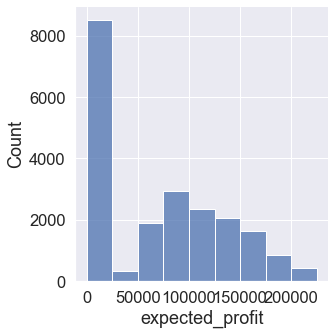

In [34]:
bin_groups = list(np.arange(0,250000,25000))
sns.displot(df4['expected_profit'], bins=bin_groups, legend=True);

### Numerical Variables

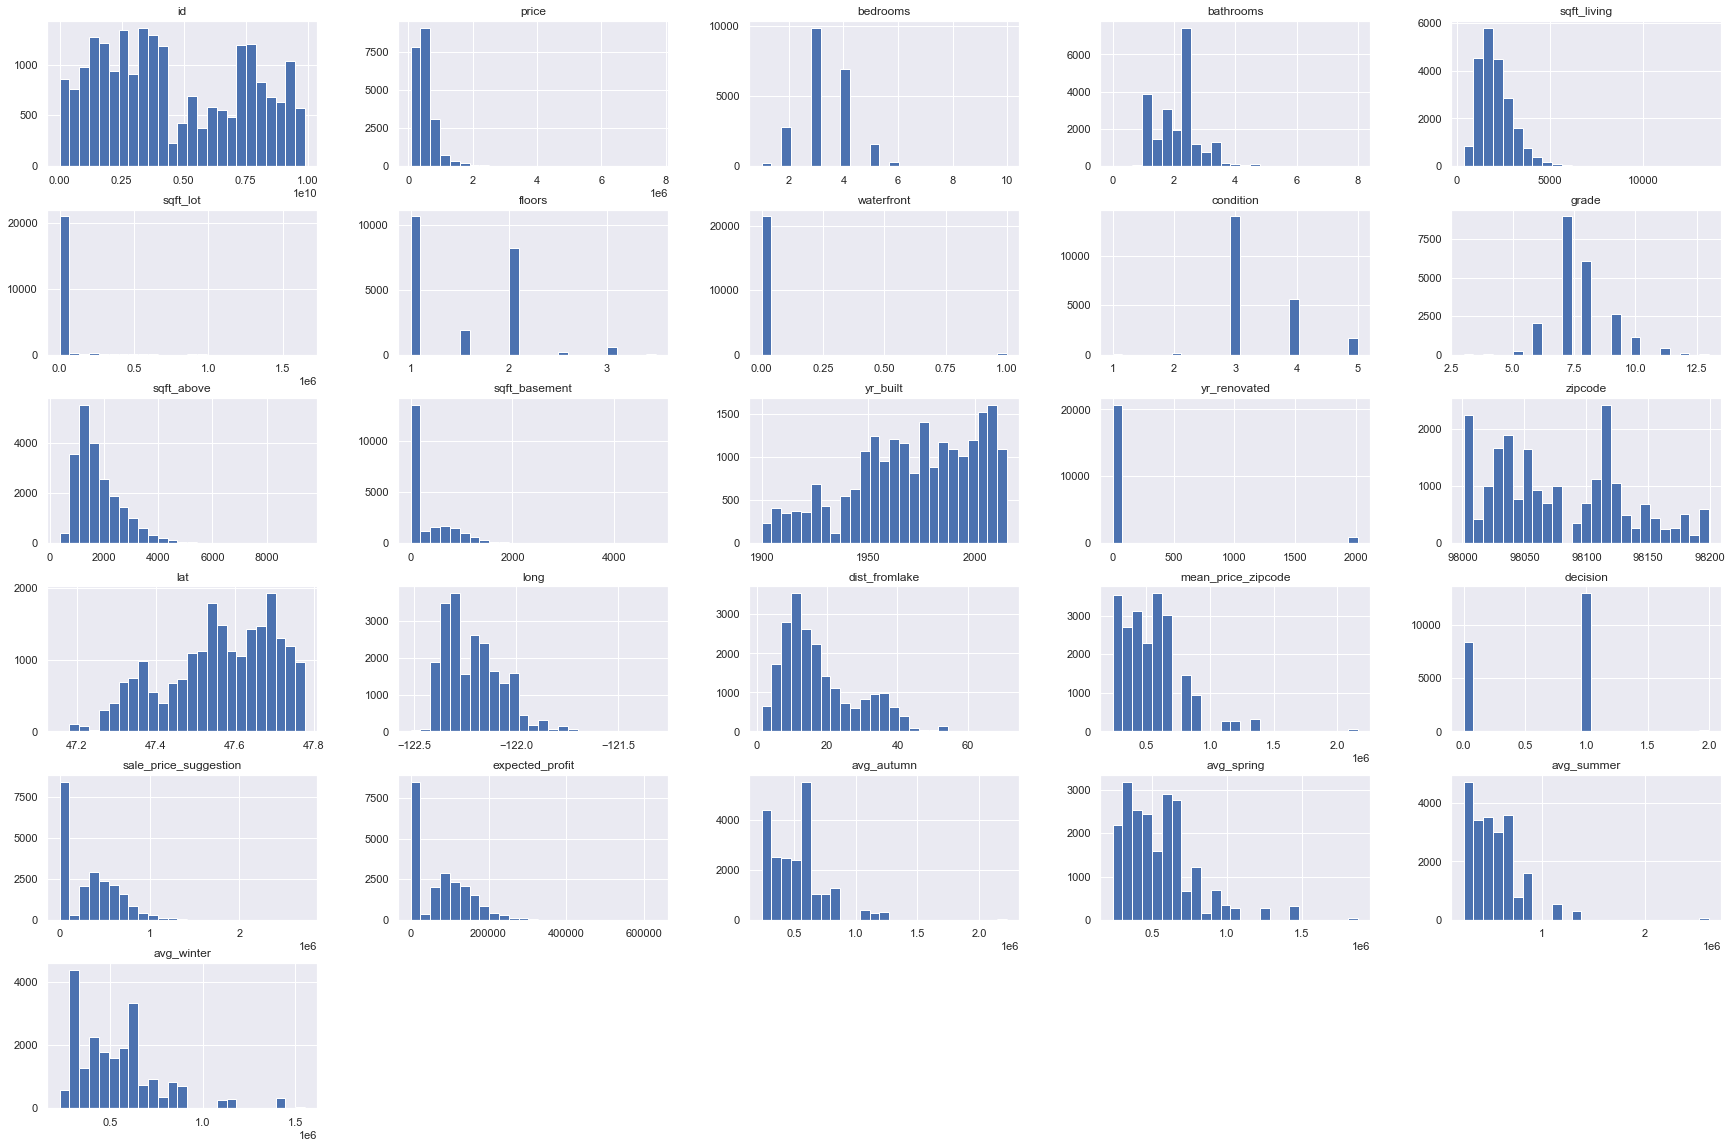

In [35]:
sns.set(rc={'figure.figsize':(30,20)})
num_df4.hist(bins=25);
personal_settings()

### Categorical Variables

In [36]:
print(cat_df4.dtypes)
cat_df4.head()

query             object
road              object
house_number      object
neighbourhood     object
city              object
county            object
state             object
season            object
season_to_sell    object
dtype: object


,query,road,house_number,neighbourhood,city,county,state,season,season_to_sell
0,"47.4635,-121.991",Southeast 154th Street,26069,NaN,NaN,King County,Washington,spring,autumn spring summer winter
1,"47.6833,-122.4",34th Avenue Northwest,7506,Sunset Hill,Seattle,King County,Washington,spring,
2,"47.5794,-122.025",Southeast 32nd Way,23601,NaN,NaN,King County,Washington,spring,
3,"47.515,-121.87",Southeast Terrace Street,35246,NaN,NaN,King County,Washington,spring,winter
4,"47.5443,-122.177",Southeast 65th Street,12201,NaN,Bellevue,King County,Washington,spring,autumn spring summer winter


## <font color='red'> Bivariate Analysis

In [37]:
print('Hypothesis Resume \n\n')
tab = [ ['Hypothesis', 'Conclusion', 'Relevance'],
        ['H1','True/False','High/Low'],
      ]

print(tabulate(tab, headers = 'firstrow'))

Hypothesis Resume 


Hypothesis    Conclusion    Relevance
------------  ------------  -----------
H1            True/False    High/Low


## Multivatiate Analysis

### Numerical Attributes

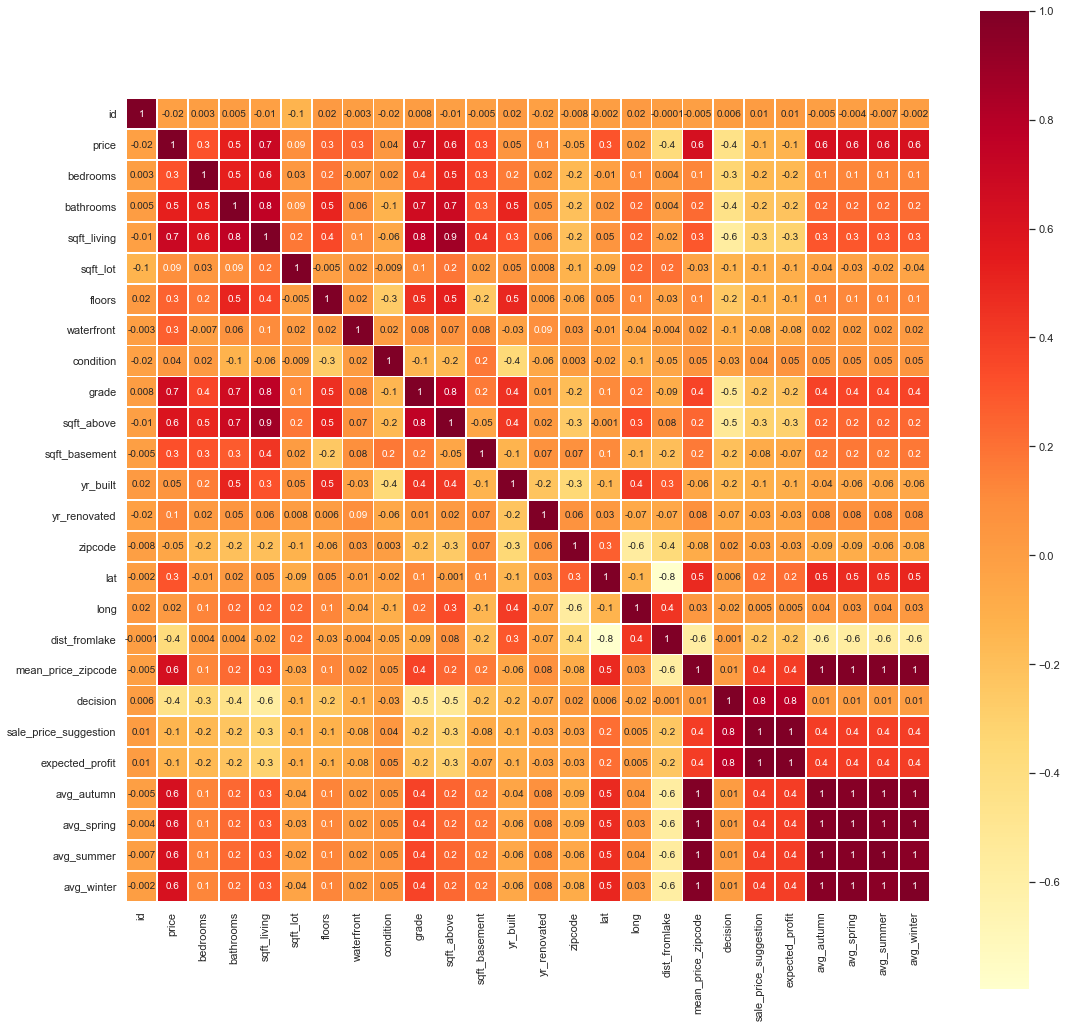

In [38]:
correlation = num_df4.corr(method='pearson')

sns.set(font_scale=1.2)
sns.set(rc={'figure.figsize':(18,18)})
sns.heatmap(correlation, 
            cmap='YlOrRd', 
            annot=True, 
            annot_kws= {'fontsize':'small'},
            fmt='.1g',
            linewidths=0.8, 
            square=True);

personal_settings()

### Categorical Attributes

In [39]:
print(cat_df4.shape)
cat_df4.head()

(21598, 9)


,query,road,house_number,neighbourhood,city,county,state,season,season_to_sell
0,"47.4635,-121.991",Southeast 154th Street,26069,NaN,NaN,King County,Washington,spring,autumn spring summer winter
1,"47.6833,-122.4",34th Avenue Northwest,7506,Sunset Hill,Seattle,King County,Washington,spring,
2,"47.5794,-122.025",Southeast 32nd Way,23601,NaN,NaN,King County,Washington,spring,
3,"47.515,-121.87",Southeast Terrace Street,35246,NaN,NaN,King County,Washington,spring,winter
4,"47.5443,-122.177",Southeast 65th Street,12201,NaN,Bellevue,King County,Washington,spring,autumn spring summer winter


# Conclusion and Visualization

In [40]:
df5=df4.copy()

In [ ]:
# Mainly Insights

In [ ]:
# Decision Dataframe Overview

In [ ]:
# Expected Profit Overview